<a href="https://colab.research.google.com/github/SamuellH12/Sorting_Hat_AI/blob/main/IAteste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#primeiro fazer upload das credenciais do kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download tunguz/big-five-personality-test
! unzip big-five-personality-test.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 95% 152M/159M [00:06<00:00, 22.3MB/s]
100% 159M/159M [00:06<00:00, 24.9MB/s]
Archive:  big-five-personality-test.zip
  inflating: IPIP-FFM-data-8Nov2018/.directory  
  inflating: IPIP-FFM-data-8Nov2018/codebook.txt  
  inflating: IPIP-FFM-data-8Nov2018/data-final.csv  


In [2]:
import pandas as pd

big5 = pd.read_csv('IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')

big5 = big5[ ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'] ]
big5.fillna(3, inplace=True)
big5 = big5.astype(int)

big5

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4,2,4,3,4,3,3,3,3,3,...,2,2,4,3,4,2,4,2,2,4
1015337,4,3,4,3,3,3,4,4,3,3,...,4,1,5,1,5,1,3,4,5,4
1015338,4,2,4,3,5,1,4,2,4,4,...,5,1,5,1,4,1,5,5,4,5
1015339,2,4,3,4,2,2,1,4,2,4,...,5,2,4,2,3,2,4,5,5,3


In [5]:
#give the negative weigths
big5[['EXT2', 'EXT4', 'EXT6', 'EXT8','EXT10', 
      'EST1', 'EST3', 'EST5', 'EST6', 'EST7',
      'EST8', 'EST9', 'EST10','AGR1', 'AGR3', 
      'AGR5', 'AGR7', 'CSN2', 'CSN4', 'CSN6',
      'CSN8', 'OPN2', 'OPN4', 'OPN6']] *= -1

big5

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,-1,5,-2,5,-1,5,-2,4,-1,...,5,-1,4,-1,4,-1,5,3,4,5
1,3,-5,3,-4,3,-3,2,-5,1,-5,...,1,-2,4,-2,3,-1,4,2,5,3
2,2,-3,4,-4,3,-2,1,-3,2,-5,...,5,-1,2,-1,4,-2,5,3,4,4
3,2,-2,2,-3,4,-2,2,-4,1,-4,...,4,-2,5,-2,3,-1,4,4,3,3
4,3,-3,3,-3,5,-3,3,-5,3,-4,...,5,-1,5,-1,5,-1,5,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4,-2,4,-3,4,-3,3,-3,3,-3,...,2,-2,4,-3,4,-2,4,2,2,4
1015337,4,-3,4,-3,3,-3,4,-4,3,-3,...,4,-1,5,-1,5,-1,3,4,5,4
1015338,4,-2,4,-3,5,-1,4,-2,4,-4,...,5,-1,5,-1,4,-1,5,5,4,5
1015339,2,-4,3,-4,2,-2,1,-4,2,-4,...,5,-2,4,-2,3,-2,4,5,5,3


In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster

################################################################
# KMEANS COM TODAS AS CARACTERÍSTICAS (PONTUAÇÕES INDIVIDUAIS) #
################################################################

kmeansOBJ = KMeans(4)

clusters = kmeansOBJ.fit_predict(big5)

#tempo médio: 46s

In [ ]:
kmeansCentroids = kmeansOBJ.fit(big5)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

x = pd.DataFrame(clusters)
x.rename(columns={0:"Casa"}, inplace=True)

fusion = pd.concat([big5, x], axis=1)

fusion

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Casa
0,4,-1,5,-2,5,-1,5,-2,4,-1,...,-1,4,-1,4,-1,5,3,4,5,3
1,3,-5,3,-4,3,-3,2,-5,1,-5,...,-2,4,-2,3,-1,4,2,5,3,1
2,2,-3,4,-4,3,-2,1,-3,2,-5,...,-1,2,-1,4,-2,5,3,4,4,1
3,2,-2,2,-3,4,-2,2,-4,1,-4,...,-2,5,-2,3,-1,4,4,3,3,1
4,3,-3,3,-3,5,-3,3,-5,3,-4,...,-1,5,-1,5,-1,5,3,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4,-2,4,-3,4,-3,3,-3,3,-3,...,-2,4,-3,4,-2,4,2,2,4,0
1015337,4,-3,4,-3,3,-3,4,-4,3,-3,...,-1,5,-1,5,-1,3,4,5,4,0
1015338,4,-2,4,-3,5,-1,4,-2,4,-4,...,-1,5,-1,4,-1,5,5,4,5,0
1015339,2,-4,3,-4,2,-2,1,-4,2,-4,...,-2,4,-2,3,-2,4,5,5,3,2


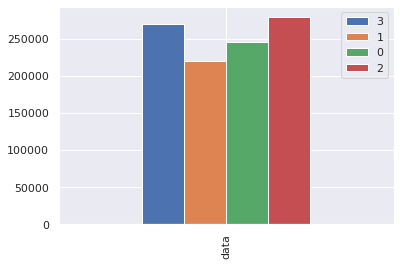

In [8]:
from collections import Counter

pd.DataFrame( Counter(fusion['Casa']), index=['data']).plot(kind='bar')

plt.show()
#K-means gera uma boa distribuição geral entre as classes

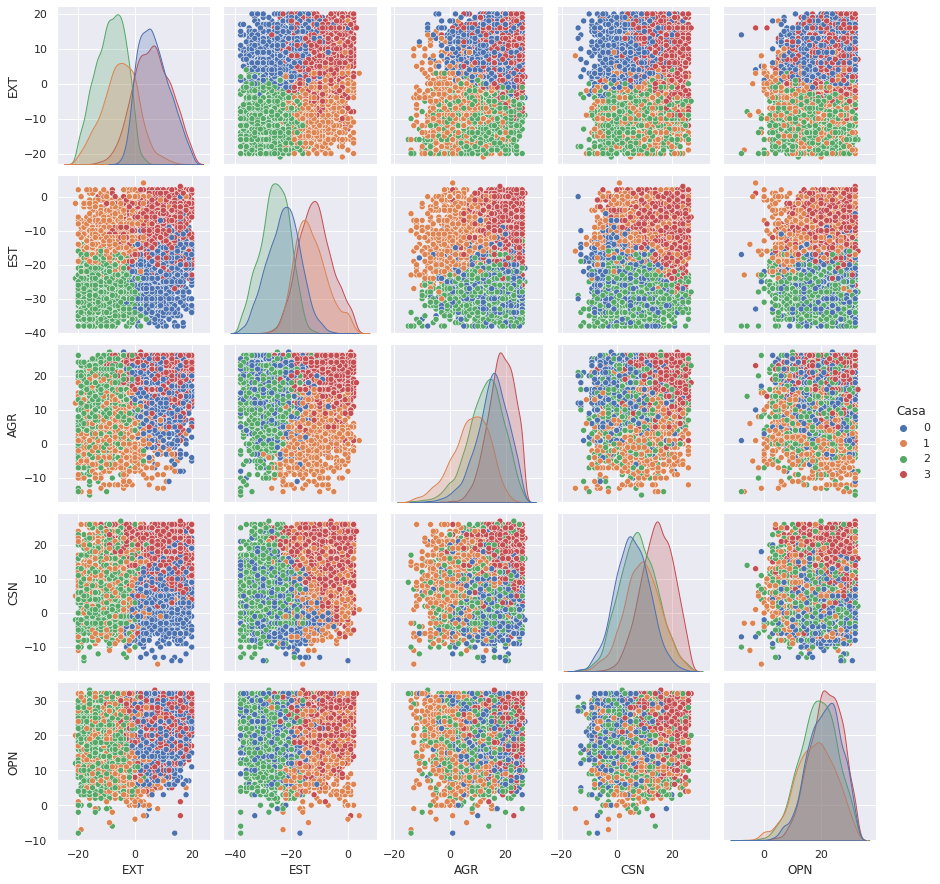

In [9]:
lEXT = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']
lEST = ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']
lAGR = ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10'] 
lCSN = ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']
lOPN = ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

dataResum = pd.DataFrame()
dataResum['EXT'] = fusion[lEXT].sum(axis=1) #.head(10000)
dataResum['EST'] = fusion[lEST].sum(axis=1)
dataResum['AGR'] = fusion[lAGR].sum(axis=1)
dataResum['CSN'] = fusion[lCSN].sum(axis=1)
dataResum['OPN'] = fusion[lOPN].sum(axis=1)
dataResum['Casa'] = fusion['Casa']

sns.pairplot(dataResum.head(10000), hue='Casa', palette=["C0", "C1", "C2", "C3"])
#sns.pairplot(fusion.head(100), hue='Casa', palette=["C0", "C1", "C2", "C3"])

plt.show()

In [10]:
#############################################################
# KMEANS COM AS CARACTERÍSTICAS RESUMIDAS (PONTUAÇÃO TOTAL) #
#############################################################

big55 = dataResum[ ['EXT', 'EST', 'AGR', 'CSN', 'OPN'] ] #obs: observar o tamanho do dataResum
kmeans5param = pd.DataFrame( kmeansOBJ.fit_predict(big55) )

kmeans5param.rename(columns={0:"Casa"}, inplace=True)

big55 = pd.concat([big55, kmeans5param], axis=1)
big55

#tempo médio: 22s

#Com menos variáveis, menor tempo de execução e resultados extremamente semelhantes,
#O k-Means com as Características do BIG5 resumidas se apresenta como uma melhor 
#alternativa prática

,EXT,EST,AGR,CSN,OPN,Casa
0,16,-12,15,8,27,2
1,-10,-13,20,13,17,3
2,-5,-14,18,10,23,3
3,-4,-17,14,1,21,3
4,-1,-7,22,24,30,2
...,...,...,...,...,...,...
1015336,4,-21,14,7,15,1
1015337,2,-32,15,4,27,1
1015338,9,-17,11,-5,30,1
1015339,-8,-23,13,14,23,0


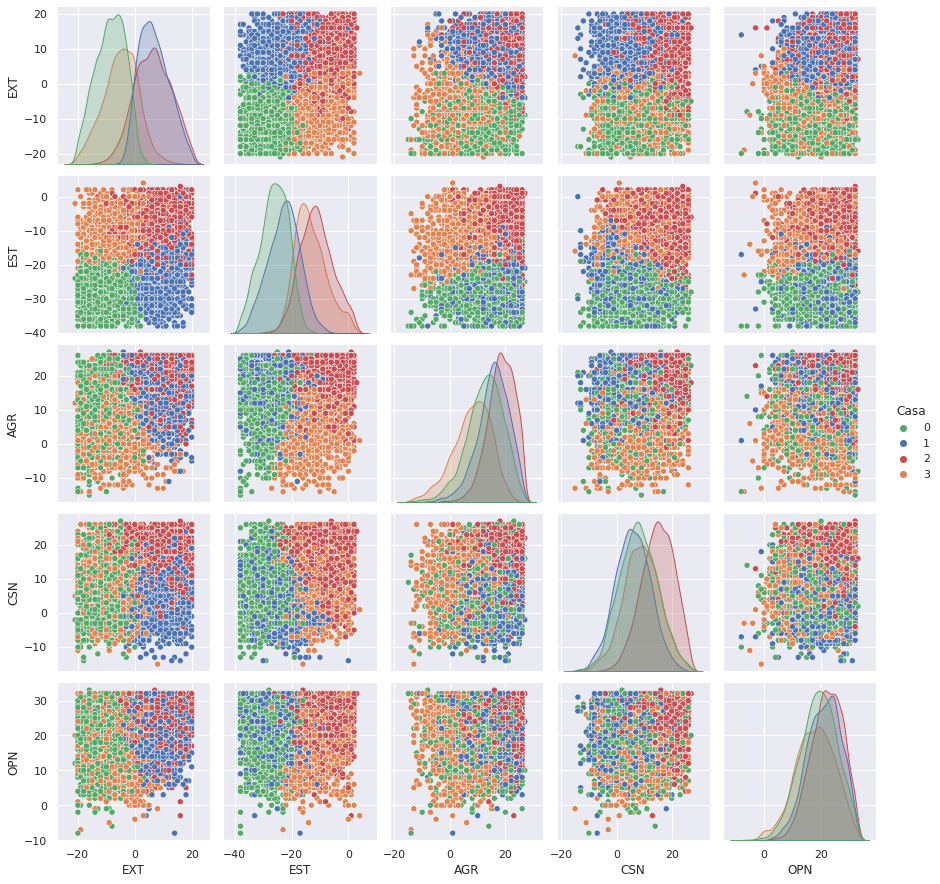

In [14]:
sns.pairplot(big55.head(10000), hue='Casa', palette=["C2", "C0", "C3", "C1"])

plt.show()

In [72]:
#Inserindo pesos nas características resumidas
#Isto para tentar melhorar a divisão nas características
#de OPN e AGR

big5p = dataResum[ ['EXT', 'EST', 'AGR', 'CSN', 'OPN'] ]

#big5p['EST'] += 20
#big5p['AGR'] -= 5
#big5p['OPN'] -= 15

big5p['EXT'] *= 1.5
big5p['EST'] *= 1.6
big5p['OPN'] *= 1.7
big5p['CSN'] *= 1.2
#big5p['AGR'] *= 1.8

kmeansWeigtP = pd.DataFrame( kmeansOBJ.fit_predict(big5p) )
kmeansWeigtP.rename(columns={0:"Casa"}, inplace=True)

big5p = pd.concat([big5p, kmeansWeigtP], axis=1)
big5p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,EXT,EST,AGR,CSN,OPN,Casa
0,24.0,-19.2,15,9.6,45.9,1
1,-15.0,-20.8,20,15.6,28.9,3
2,-7.5,-22.4,18,12.0,39.1,3
3,-6.0,-27.2,14,1.2,35.7,3
4,-1.5,-11.2,22,28.8,51.0,1
...,...,...,...,...,...,...
1015336,6.0,-33.6,14,8.4,25.5,0
1015337,3.0,-51.2,15,4.8,45.9,0
1015338,13.5,-27.2,11,-6.0,51.0,0
1015339,-12.0,-36.8,13,16.8,39.1,2


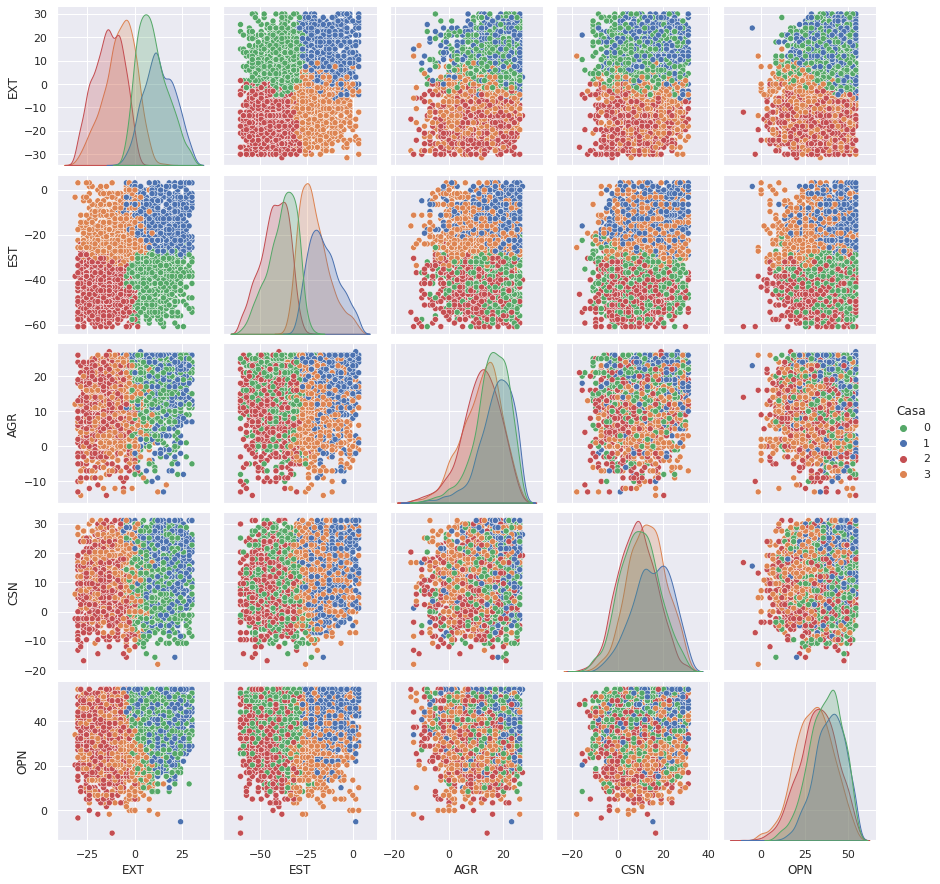

In [73]:
sns.pairplot(big5p.head(5000), hue='Casa', palette=["C2", "C0", "C3", "C1"])

plt.show()

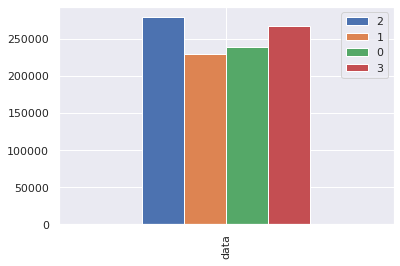

Counter({2: 279487, 3: 267184, 0: 238810, 1: 229860})


In [67]:
#Distribuição continua balanceda com os pesos? 
pd.DataFrame( Counter(big5p['Casa']), index=['data']).plot(kind='bar')
plt.show()

print(Counter(big5p['Casa']))